In [1]:
import numpy as np
import pandas as pd

## pandas和numpy的联合使用

In [2]:
# 创建pandas序列
s = pd.Series([1,2,3,np.nan,5])
print(s)

0    1.0
1    2.0
2    3.0
3    NaN
4    5.0
dtype: float64


In [3]:
# 生成时间序列
dates = pd.date_range('20221030',periods=6)
print(dates)

DatetimeIndex(['2022-10-30', '2022-10-31', '2022-11-01', '2022-11-02',
               '2022-11-03', '2022-11-04'],
              dtype='datetime64[ns]', freq='D')


In [4]:
# 创建 pandas 序列
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=['a','b','c','d'])
print(df)

                   a         b         c         d
2022-10-30  0.960101  0.363284 -1.545203 -0.592245
2022-10-31  0.770231 -2.097342 -0.276277  0.176126
2022-11-01  0.053805  1.405879 -0.576679 -0.185619
2022-11-02 -0.861944  0.144244  1.285392  0.299419
2022-11-03 -0.886534 -1.209732  0.399322  0.651159
2022-11-04 -1.127055 -0.746463 -0.621776  0.657907


In [5]:
# 按照序列进行排序
df1 = df.sort_index(axis = 1,ascending=False)   # 按列序号
print(df1)

df2 = df.sort_index(axis = 0,ascending=False)   # 按行序号
print('\n',df2)

                   d         c         b         a
2022-10-30 -0.592245 -1.545203  0.363284  0.960101
2022-10-31  0.176126 -0.276277 -2.097342  0.770231
2022-11-01 -0.185619 -0.576679  1.405879  0.053805
2022-11-02  0.299419  1.285392  0.144244 -0.861944
2022-11-03  0.651159  0.399322 -1.209732 -0.886534
2022-11-04  0.657907 -0.621776 -0.746463 -1.127055

                    a         b         c         d
2022-11-04 -1.127055 -0.746463 -0.621776  0.657907
2022-11-03 -0.886534 -1.209732  0.399322  0.651159
2022-11-02 -0.861944  0.144244  1.285392  0.299419
2022-11-01  0.053805  1.405879 -0.576679 -0.185619
2022-10-31  0.770231 -2.097342 -0.276277  0.176126
2022-10-30  0.960101  0.363284 -1.545203 -0.592245


In [13]:
# 对值进行排序
df3 = df.sort_values(by='a')
print(df3)

                   a         b         c         d
2022-11-04 -1.127055 -0.746463 -0.621776  0.657907
2022-11-03 -0.886534 -1.209732  0.399322  0.651159
2022-11-02 -0.861944  0.144244  1.285392  0.299419
2022-11-01  0.053805  1.405879 -0.576679 -0.185619
2022-10-31  0.770231 -2.097342 -0.276277  0.176126
2022-10-30  0.960101  0.363284 -1.545203 -0.592245
-1.1270546244670645


## 选择数据

In [8]:
print(df)
print('\n选取某一列：')
print(df.a,'\n=== 两种形式等价 ===\n',df['a'])

                   a         b         c         d
2022-10-30  0.923209 -0.458425  0.144312  0.394993
2022-10-31  0.370999 -0.971600 -0.308071 -2.608743
2022-11-01 -1.662832 -0.897717 -0.698834 -0.586315
2022-11-02  0.039010 -0.450490  1.984953  0.342273
2022-11-03  1.571661 -1.653845  1.362166  0.125359
2022-11-04 -1.008184 -0.065594  0.621941 -0.197450

选取某一列：
2022-10-30    0.923209
2022-10-31    0.370999
2022-11-01   -1.662832
2022-11-02    0.039010
2022-11-03    1.571661
2022-11-04   -1.008184
Freq: D, Name: a, dtype: float64 
=== 两种形式等价 ===
 2022-10-30    0.923209
2022-10-31    0.370999
2022-11-01   -1.662832
2022-11-02    0.039010
2022-11-03    1.571661
2022-11-04   -1.008184
Freq: D, Name: a, dtype: float64


### select by label ： loc

In [9]:
print(df.loc['20221030'])   # 选取某一行
print(df.loc[:,['a','b']])  # 所有行的 ‘a’ ‘b’ 两列
print(df.loc[['20221030','20221031'],['a','b']])    # 需要某行的某列

a    0.923209
b   -0.458425
c    0.144312
d    0.394993
Name: 2022-10-30 00:00:00, dtype: float64
                   a         b
2022-10-30  0.923209 -0.458425
2022-10-31  0.370999 -0.971600
2022-11-01 -1.662832 -0.897717
2022-11-02  0.039010 -0.450490
2022-11-03  1.571661 -1.653845
2022-11-04 -1.008184 -0.065594
                   a         b
2022-10-30  0.923209 -0.458425
2022-10-31  0.370999 -0.971600


### select by position ： iloc

In [14]:
print('\n',df.iloc[0,0])    # 某个元素
print(df.iloc[1:2,0:4])     # 前包后不含 【1：2），【0：4）


 0.9601013503539664
                   a         b         c         d
2022-10-31  0.770231 -2.097342 -0.276277  0.176126


### 混合索引

In [23]:
print(df)

# 方法1：
print(df.loc['20221030',df.columns[1]])
print(df.loc[df.index[0],'b'])

# 方法2：
print(df.iloc[df.index.get_loc('20221030'),1])
print(df.iloc[0,df.columns.get_loc('b')])

                   a         b         c         d
2022-10-30  0.960101  0.363284 -1.545203 -0.592245
2022-10-31  0.770231 -2.097342 -0.276277  0.176126
2022-11-01  0.053805  1.405879 -0.576679 -0.185619
2022-11-02 -0.861944  0.144244  1.285392  0.299419
2022-11-03 -0.886534 -1.209732  0.399322  0.651159
2022-11-04 -1.127055 -0.746463 -0.621776  0.657907
0.3632836309828478
0.3632836309828478
0.3632836309828478
0.3632836309828478


In [11]:
# Boolean indexing
print(df[df.a>0])

                   a         b         c         d
2022-10-30  0.923209 -0.458425  0.144312  0.394993
2022-10-31  0.370999 -0.971600 -0.308071 -2.608743
2022-11-02  0.039010 -0.450490  1.984953  0.342273
2022-11-03  1.571661 -1.653845  1.362166  0.125359


## Pandas 赋值

In [12]:
import numpy as np
import pandas as pd

dates = pd.date_range('20221101',periods=6)
df = pd.DataFrame(np.arange(24).reshape(6,4),index=dates,columns=['a','b','c','d'])
print(df)

             a   b   c   d
2022-11-01   0   1   2   3
2022-11-02   4   5   6   7
2022-11-03   8   9  10  11
2022-11-04  12  13  14  15
2022-11-05  16  17  18  19
2022-11-06  20  21  22  23


In [13]:
# 修改值
df.iloc[2,2] = 36
df.loc['20221102','b'] = 24 
df.a[df.a>10] = 11
df['e'] = np.nan                                # 添加空列
df['f'] = pd.Series([1,2,3,4,5,6],index=dates)  # 添加含有值的列，利用 Series

print(df)

             a   b   c   d   e  f
2022-11-01   0   1   2   3 NaN  1
2022-11-02   4  24   6   7 NaN  2
2022-11-03   8   9  36  11 NaN  3
2022-11-04  11  13  14  15 NaN  4
2022-11-05  11  17  18  19 NaN  5
2022-11-06  11  21  22  23 NaN  6


## 处理丢失数据

In [14]:
# 对于 含有 NAN 的数据进行处理
dates = pd.date_range('20221101',periods=6)
df = pd.DataFrame(np.arange(24).reshape(6,4),index=dates,columns=['a','b','c','d'])

df.iloc[0,1] = np.nan
df.iloc[1,2] = np.nan
print(df)

             a     b     c   d
2022-11-01   0   NaN   2.0   3
2022-11-02   4   5.0   NaN   7
2022-11-03   8   9.0  10.0  11
2022-11-04  12  13.0  14.0  15
2022-11-05  16  17.0  18.0  19
2022-11-06  20  21.0  22.0  23


In [15]:
# 清除含 NAN 的情况
# axis = 0/1 (行/列)
# how = {'any','all'} = {‘任意含有’，‘全部都为 NAN’}
print(df.dropna(axis = 0,how='all'))

             a     b     c   d
2022-11-01   0   NaN   2.0   3
2022-11-02   4   5.0   NaN   7
2022-11-03   8   9.0  10.0  11
2022-11-04  12  13.0  14.0  15
2022-11-05  16  17.0  18.0  19
2022-11-06  20  21.0  22.0  23


In [16]:
# 对 NAN 进行替换
print(df.fillna(value=2333))

             a       b       c   d
2022-11-01   0  2333.0     2.0   3
2022-11-02   4     5.0  2333.0   7
2022-11-03   8     9.0    10.0  11
2022-11-04  12    13.0    14.0  15
2022-11-05  16    17.0    18.0  19
2022-11-06  20    21.0    22.0  23


In [17]:
# 检查是 NAN 的元素
print(df.isnull())

                a      b      c      d
2022-11-01  False   True  False  False
2022-11-02  False  False   True  False
2022-11-03  False  False  False  False
2022-11-04  False  False  False  False
2022-11-05  False  False  False  False
2022-11-06  False  False  False  False


In [18]:
# 检查整个 pd 是否有NAN的元素
print(np.any(df.isnull()) == True)

True


## Pandas 合并

In [30]:
# contact 合并
df1 = pd.DataFrame(np.ones((3,4)),columns=['a','b','c','d'])
# print(df1)
df2 = pd.DataFrame(np.ones((3,4))*2,columns=['a','b','c','d'])
# print(df2)

# axis = {0,1} = {上下，左右}
# ignore_index : 用来对新序列的 index 重新排序
res = pd.concat([df1,df2],axis=0,ignore_index=True)
print(res)

     a    b    c    d
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
3  2.0  2.0  2.0  2.0
4  2.0  2.0  2.0  2.0
5  2.0  2.0  2.0  2.0


##### 对于 Columns 不同的序列进行合并

In [34]:
df11 = pd.DataFrame(np.ones((3,4)),columns=['a','b','c','d'])
df22 = pd.DataFrame(np.ones((3,4))*2,columns=['b','g','c','d'])

# join = {'inner','outer'} = {‘仅对相同的项合并’，‘不同的项可以进行添 NAN 合并’}
res2 = pd.concat([df11,df22],join='outer',ignore_index=True) 
print(res2)

     a    b    c    d    g
0  1.0  1.0  1.0  1.0  NaN
1  1.0  1.0  1.0  1.0  NaN
2  1.0  1.0  1.0  1.0  NaN
3  NaN  2.0  2.0  2.0  2.0
4  NaN  2.0  2.0  2.0  2.0
5  NaN  2.0  2.0  2.0  2.0


## Pandas plot 绘图

In [52]:
import matplotlib.pyplot as plt

#### Series

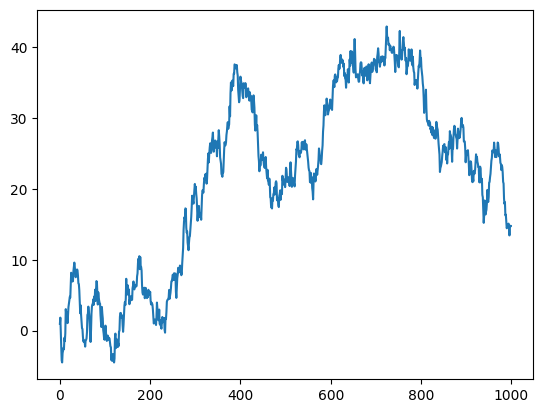

In [54]:
data = pd.Series(np.random.randn(1000),index=np.arange(1000))
data = data.cumsum()    # 累加
data.plot()
plt.show()

#### DataFrame

          A         B         C         D
0  1.053267  0.094189 -0.797344 -1.466108
1  1.380205  0.659106  0.290281 -0.265100
2  0.797148  1.879766 -0.794619 -0.117981
3 -2.613918  0.027551  0.690984  0.942070
4 -1.532168 -2.032759 -0.362096  0.209922


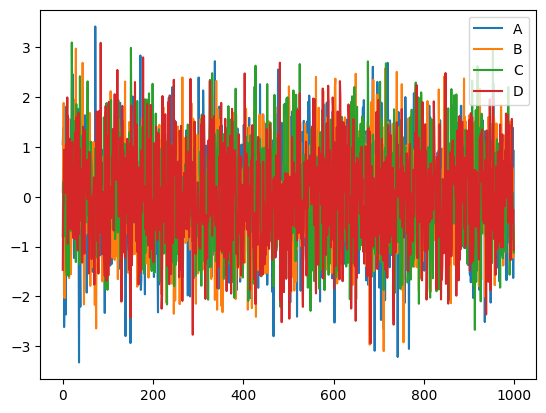

In [65]:
data = pd.DataFrame(np.random.randn(1000,4),index=np.arange(1000),columns=list("ABCD"))
print(data.head())

data.cumsum()
data.plot()
plt.show()

<AxesSubplot: xlabel='A', ylabel='C'>

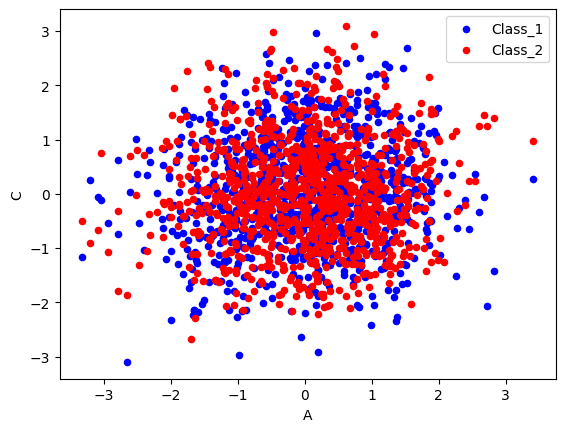

In [67]:
# 点云图
ax = data.plot.scatter(x = 'A',y = 'B',color = 'Blue',label = 'Class_1')
data.plot.scatter(x = 'A',y = "C",color = "Red",label = 'Class_2',ax = ax)